In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [75]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

# Train Data Overview

In [76]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Признаки, содержащие пропущенные значения в наборе данных train, - это Age, Cabin и Embarked. Так как количество объектов в train_df составляет 891, то недостающие значения признака Cabin составят 70 %, признака Age - 20 %, а признака Embarked - менее 1 %.

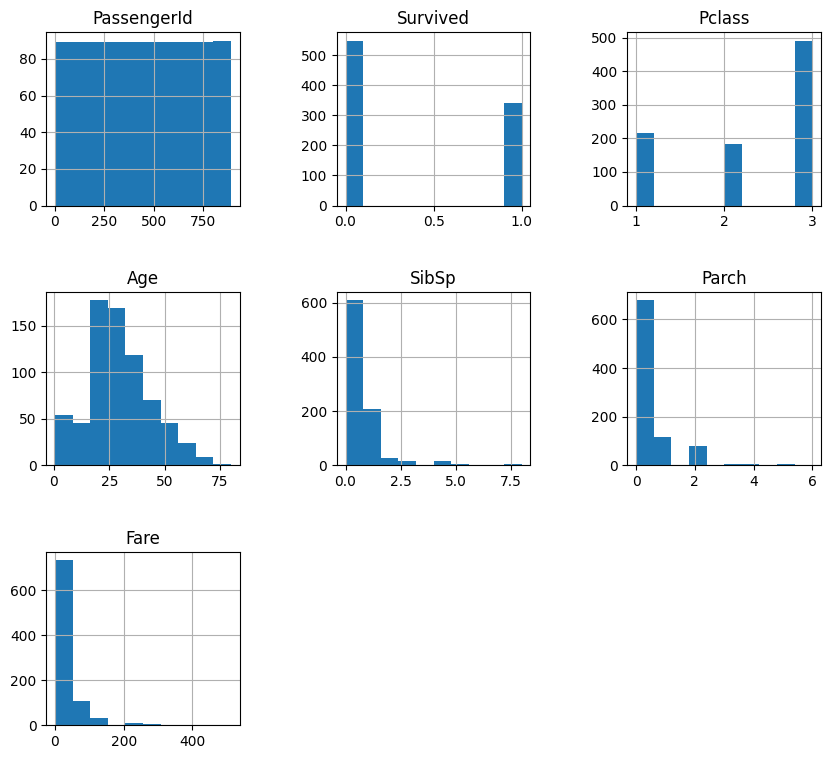

In [79]:
train_df.hist(figsize=(10,9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

По этим гистограммам видно, что погибло больше людей, чем выжило, в 3-м классе было больше людей, а также больше дешевых билетов. На борту были преимущественно молодые люди, в основном около 25 лет. Большинство людей были без братьев и сестер, супругов, а также без детей и родителей.

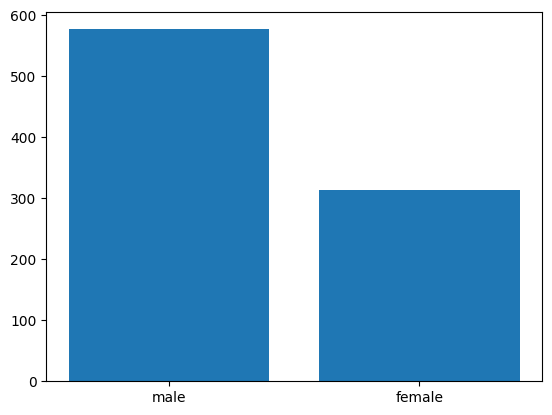

In [80]:
gender_counts = train_df['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.show()

Мужчин на борту было больше, чем женщин.

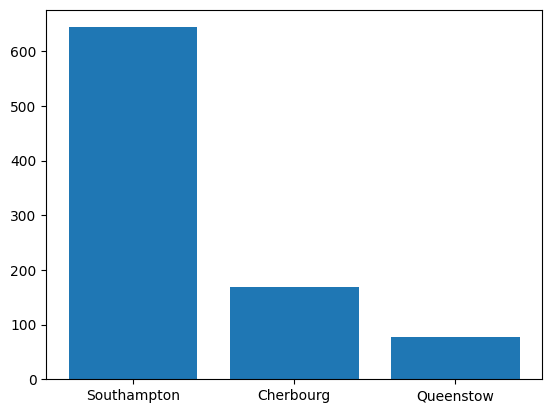

In [81]:
port_counts = train_df['Embarked'].value_counts()
plt.bar(port_counts.index, port_counts.values)
custom_labels = ['Southampton', 'Cherbourg','Queenstow']
plt.xticks(range(len(custom_labels)),custom_labels)
plt.show()

Было больше людей из Southampton

# Outliers

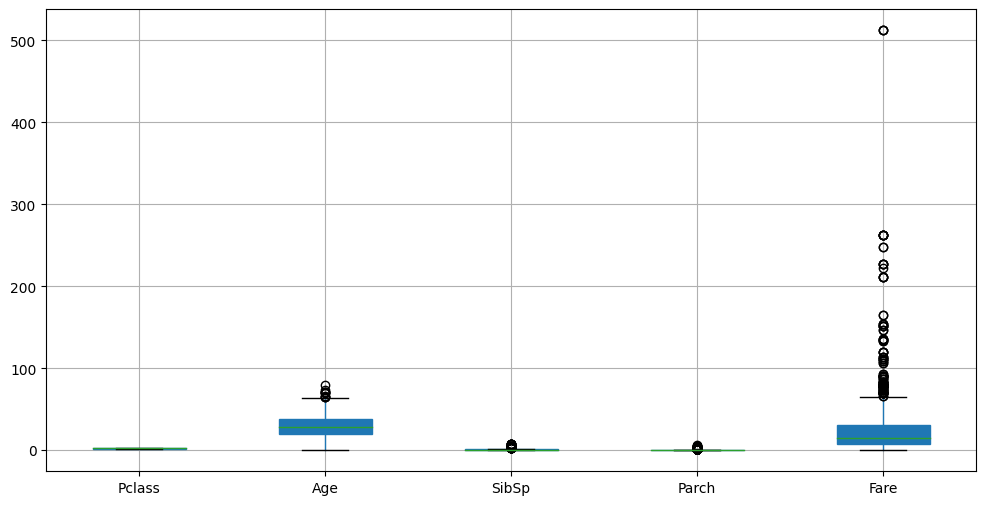

In [82]:
plt.figure(figsize=(12, 6))
train_df.drop(columns=['PassengerId','Survived']).boxplot(sym='o', patch_artist=True)
plt.show()

In [83]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В столбцах Age, SibSp, Parch и Fare, похоже, есть выбросы. Но если мы посмотрим на график распределения, то максимальный возраст составляет 80 лет, что кажется вполне реальным. Для SibSp (максимум 8) и Parch (максимум около 6) эти значения также кажутся вполне реальными. Что касается тарифов, то самый дорогой билет, был немного дороже 500, что также может быть реальным, если это билет первого класса, это мы проверим позже.

In [84]:
expensive_tickets = train_df.loc[train_df['Fare'] > (train_df['Fare'].mean()+ 3 * train_df['Fare'].std())]
expensive_tickets.shape[0]==sum(expensive_tickets['Pclass'] == 1) #check if all expensive tickets belong to 1st class

True

Таким образом, выбросы в колонке Fare имеют смысл, поскольку они относятся к пассажирам 1-го класса.

In [85]:
train_df.loc[train_df['Parch'] > (train_df['Parch'].mean()+ 3 * train_df['Parch'].std())] # passengers that have a lot of children


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


Большинство людей с большим количеством детей относятся к 3 классу. Единственная сомнение - это мужчина, которому 16 лет и у которого в этой графе 3 , 2 из которых могут быть родителями, но все равно 1 ребенок. Единственное, что в прошлом были случаи, когда дети появлялись в довольно молодом возрасте, и он тоже относится к 3 классу. И, похоже, он единственный молодой человек, имеющий ребенка, так как здесь показаны все люди с Parch > 2.

In [86]:
train_df.loc[train_df['SibSp'] > (train_df['SibSp'].mean()+ 3 * train_df['SibSp'].std())] # passengers that have a lot of siblings

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


Что касается людей с большим количеством братьев и сестер, то все они принадлежат к третьему классу, поэтому это тоже скорее всего не выбросы

# Duplicates


In [87]:
#if all passenger ids are unique
train_df['PassengerId'].nunique() == train_df.shape[0]

True

По идентификатору пассажира копий нет.

# What is important for decision making


In [88]:
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-88-bc689fd8a37d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


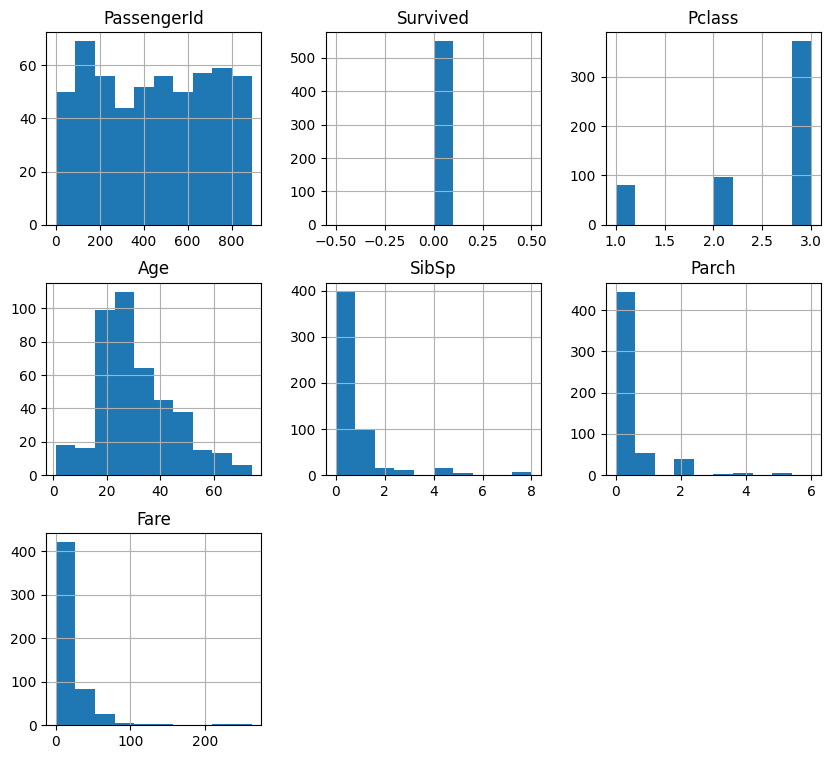

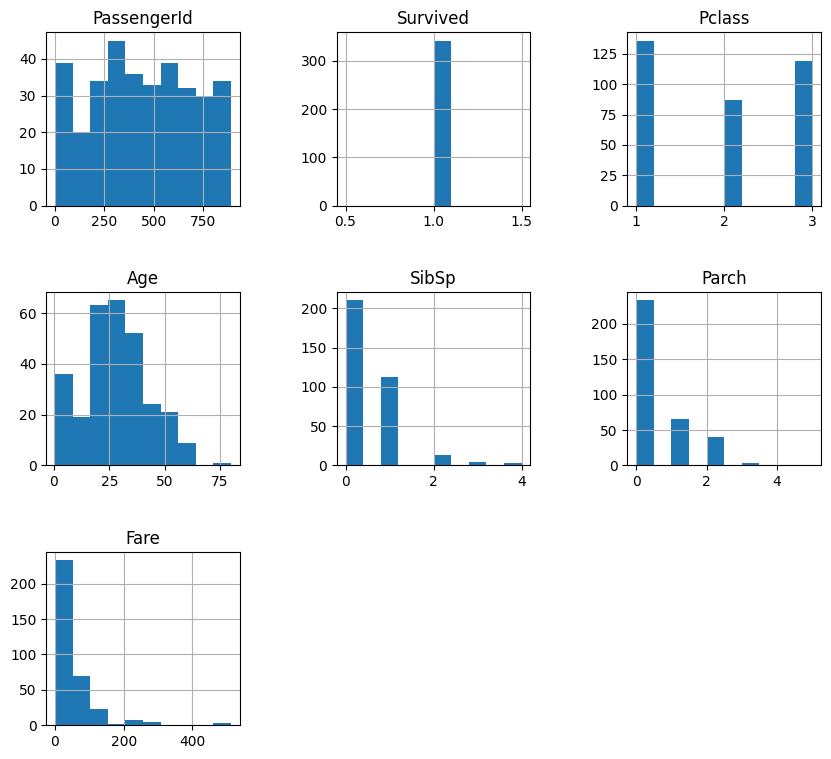

In [89]:
train_df.groupby('Survived').hist(figsize=(10,9))#maybe move
plt.subplots_adjust(hspace=0.5, wspace=0.5)

Age Parameter:
Из корреляции видна довольно слабая отрицательная связь с параметром возраста, что означает, что более молодые люди с большей вероятностью выжили, также из гистограмм видно, что нет существенной разницы между выжившими и погибшими, но все же дети имели больше шансов выжить и некоторые пожилые люди.
SibSp(siblings and spouse) parameter:
Слабая отрицательная корреляция (люди с меньшим количеством братьев и сестер могут иметь немного больше шансов выжить), на гистограммах также нет большой разницы между выжившими, только единственное люди с этим параметром больше 4 все умерли.
Parch(children and parents) Parameter:
Для этого параметра наблюдается немного более сильная положительная корреляция. Судя по гистограмме, количество выживших одиноких людей почти в два раза больше, чем погибших, но люди с этим параметром больше 4 все погибли.
Fare Parameter:
Положительная корреляция между параметром Fare и Survived, причем эта корреляция сильнее, чем для предыдущих параметров. Чем выше fare, тем выше вероятность выжить.
Pclass Paramater:
Pclass Paramater - параметр, который больше всего влияет на выживание. Он имеет отрицательную корреляцию, так как класс 3 означает низший класс, поэтому люди с более высоким классом имели больше шансов выжить.

В заключение, все эти характеристики могут оказывать некоторое влияние на survived, поэтому их не следует удалять.

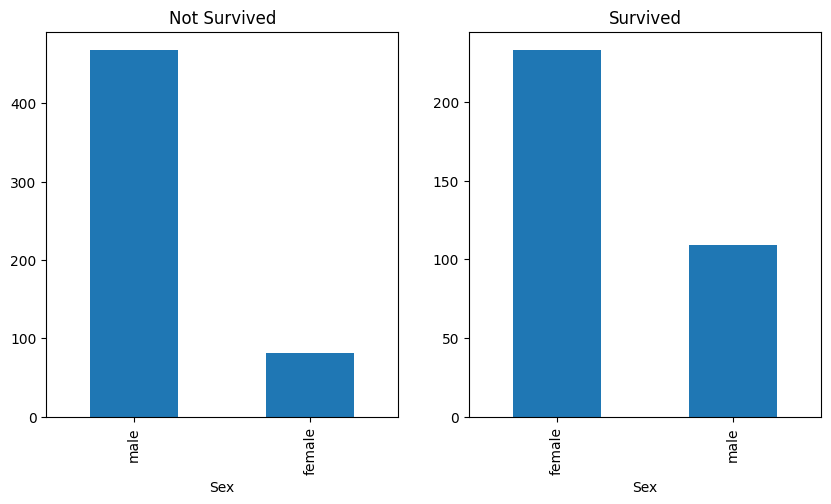

In [90]:
grouped_df = train_df.groupby('Survived')


survived_counts = grouped_df['Sex'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

survived_counts.loc[0].plot(kind='bar', ax=axes[0])
axes[0].set_title('Not Survived')

survived_counts.loc[1].plot(kind='bar', ax=axes[1])
axes[1].set_title('Survived')

plt.show()

Выжило больше женщин, чем мужчин. Таким образом, я можно сделать вывод, что пол влияет на вероятность выживания.

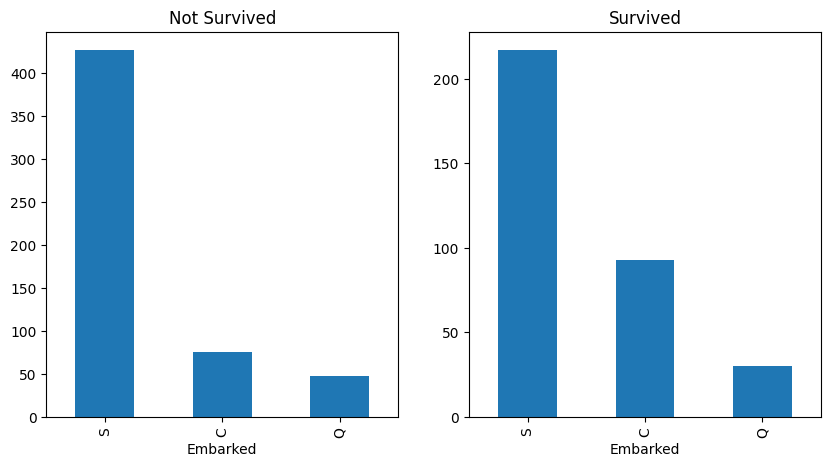

In [91]:
df_cleaned_emb= train_df.dropna(subset=['Embarked'])
grouped_df = train_df.groupby('Survived')


survived_counts = grouped_df['Embarked'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

survived_counts.loc[0].plot(kind='bar', ax=axes[0])
axes[0].set_title('Not Survived')

survived_counts.loc[1].plot(kind='bar', ax=axes[1])
axes[1].set_title('Survived')

plt.show()

Заметной зависимости от того, где человек отправился в путешествие, нет. Этот признак является категориальным и не оказывает сильного влияния, кроме того, в train dataset отсутствуют некоторые значения в этом столбце, поэтому впоследствии его можно будет опустить.

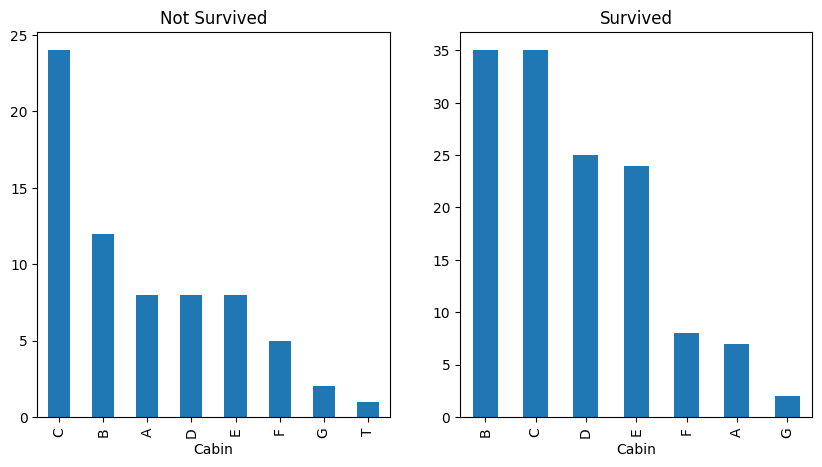

In [92]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else np.nan)
df_cleaned_cabin= train_df.dropna(subset=['Cabin'])
grouped_df = df_cleaned_cabin.groupby('Survived')


survived_counts = grouped_df['Cabin'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

survived_counts.loc[0].plot(kind='bar', ax=axes[0])
axes[0].set_title('Not Survived')

survived_counts.loc[1].plot(kind='bar', ax=axes[1])
axes[1].set_title('Survived')

plt.show()

Тип каюты тоже похоже не повлиял на выживание. Возможно, только больше людей из кают B,C выжили. Поскольку и в train_set, и в test_dataset много пропущенных значений для этого столбца, он категориальный и он не оказывает особого влияния, его можно будет опустить

# Missing Values

In [93]:
# as age is the most correlated with class replace missing values with age
# mean for certain class
class_mean_age = train_df.groupby('Pclass')['Age'].transform('mean')
train_df['Age'] = train_df['Age'].fillna(class_mean_age)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Здесь отсутствуют значения в столбцах Cabin и Fare, но мы их опустим.

#**Test Data**

In [95]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Для train_set столбцы с пропущенными значениями - это Age и Cabin (как и в train_set), а также Fare. Здесь также количество пропущенных значений для Cabin значительно и составляет почти 78 % от всего набора данных. Количество пропущенных значений для столбца Age такое же, как и train_set (20 %). В характеристике Fare есть только один объект с пропущенным значением.

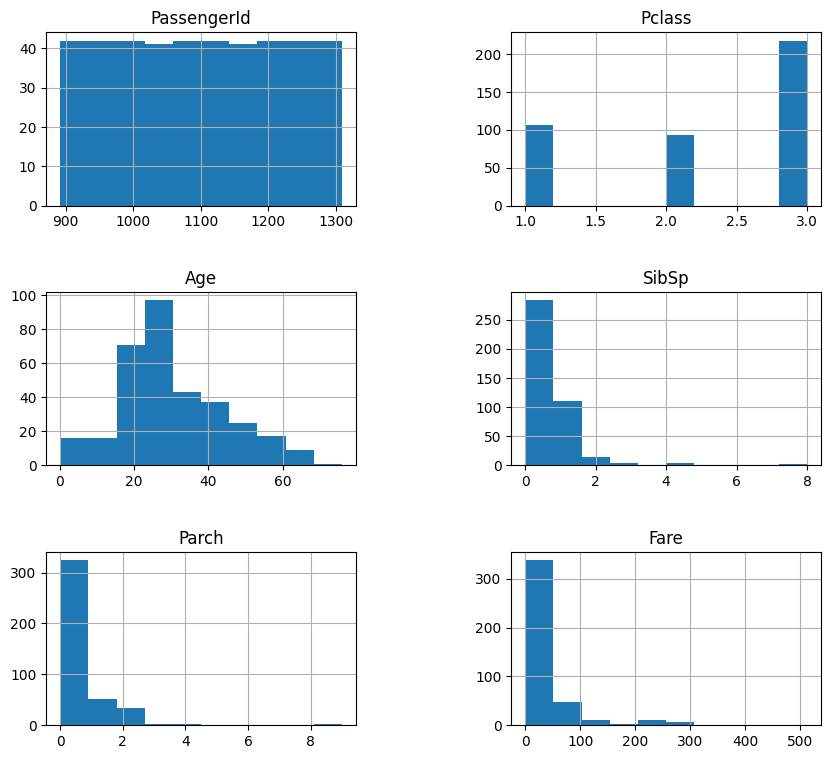

In [98]:
test_df.hist(figsize=(10,9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [99]:
# as age is the most correlated with class replace missing values with age
# mean for certain class
class_mean_age = test_df.groupby('Pclass')['Age'].transform('mean')
test_df['Age'] = test_df['Age'].fillna(class_mean_age)

In [100]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [101]:
# fare is correlated with class, so we will replace missing value with
#the mean of that class which missing value belongs to
class_mean_fare = test_df.groupby('Pclass')['Fare'].transform('mean')
test_df['Fare'] = test_df['Fare'].fillna(class_mean_fare)

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Единственная колонка с пропущенными значениями - это Cabin, которую мы вдальнейшем опустим.

# Division into features and target valiables

In [103]:
#categorical variables preparation
train_df['Sex'] = train_df['Sex'].replace({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})

In [104]:
X_train = train_df.drop(columns =["PassengerId","Survived","Name","Ticket","Cabin","Embarked"], axis =1).values
y_train = train_df["Survived"].values

In [105]:
X_test = test_df.drop(columns =["PassengerId","Name","Ticket","Cabin","Embarked"], axis =1).values

In [106]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
model = clf.fit(X_train, y_train)


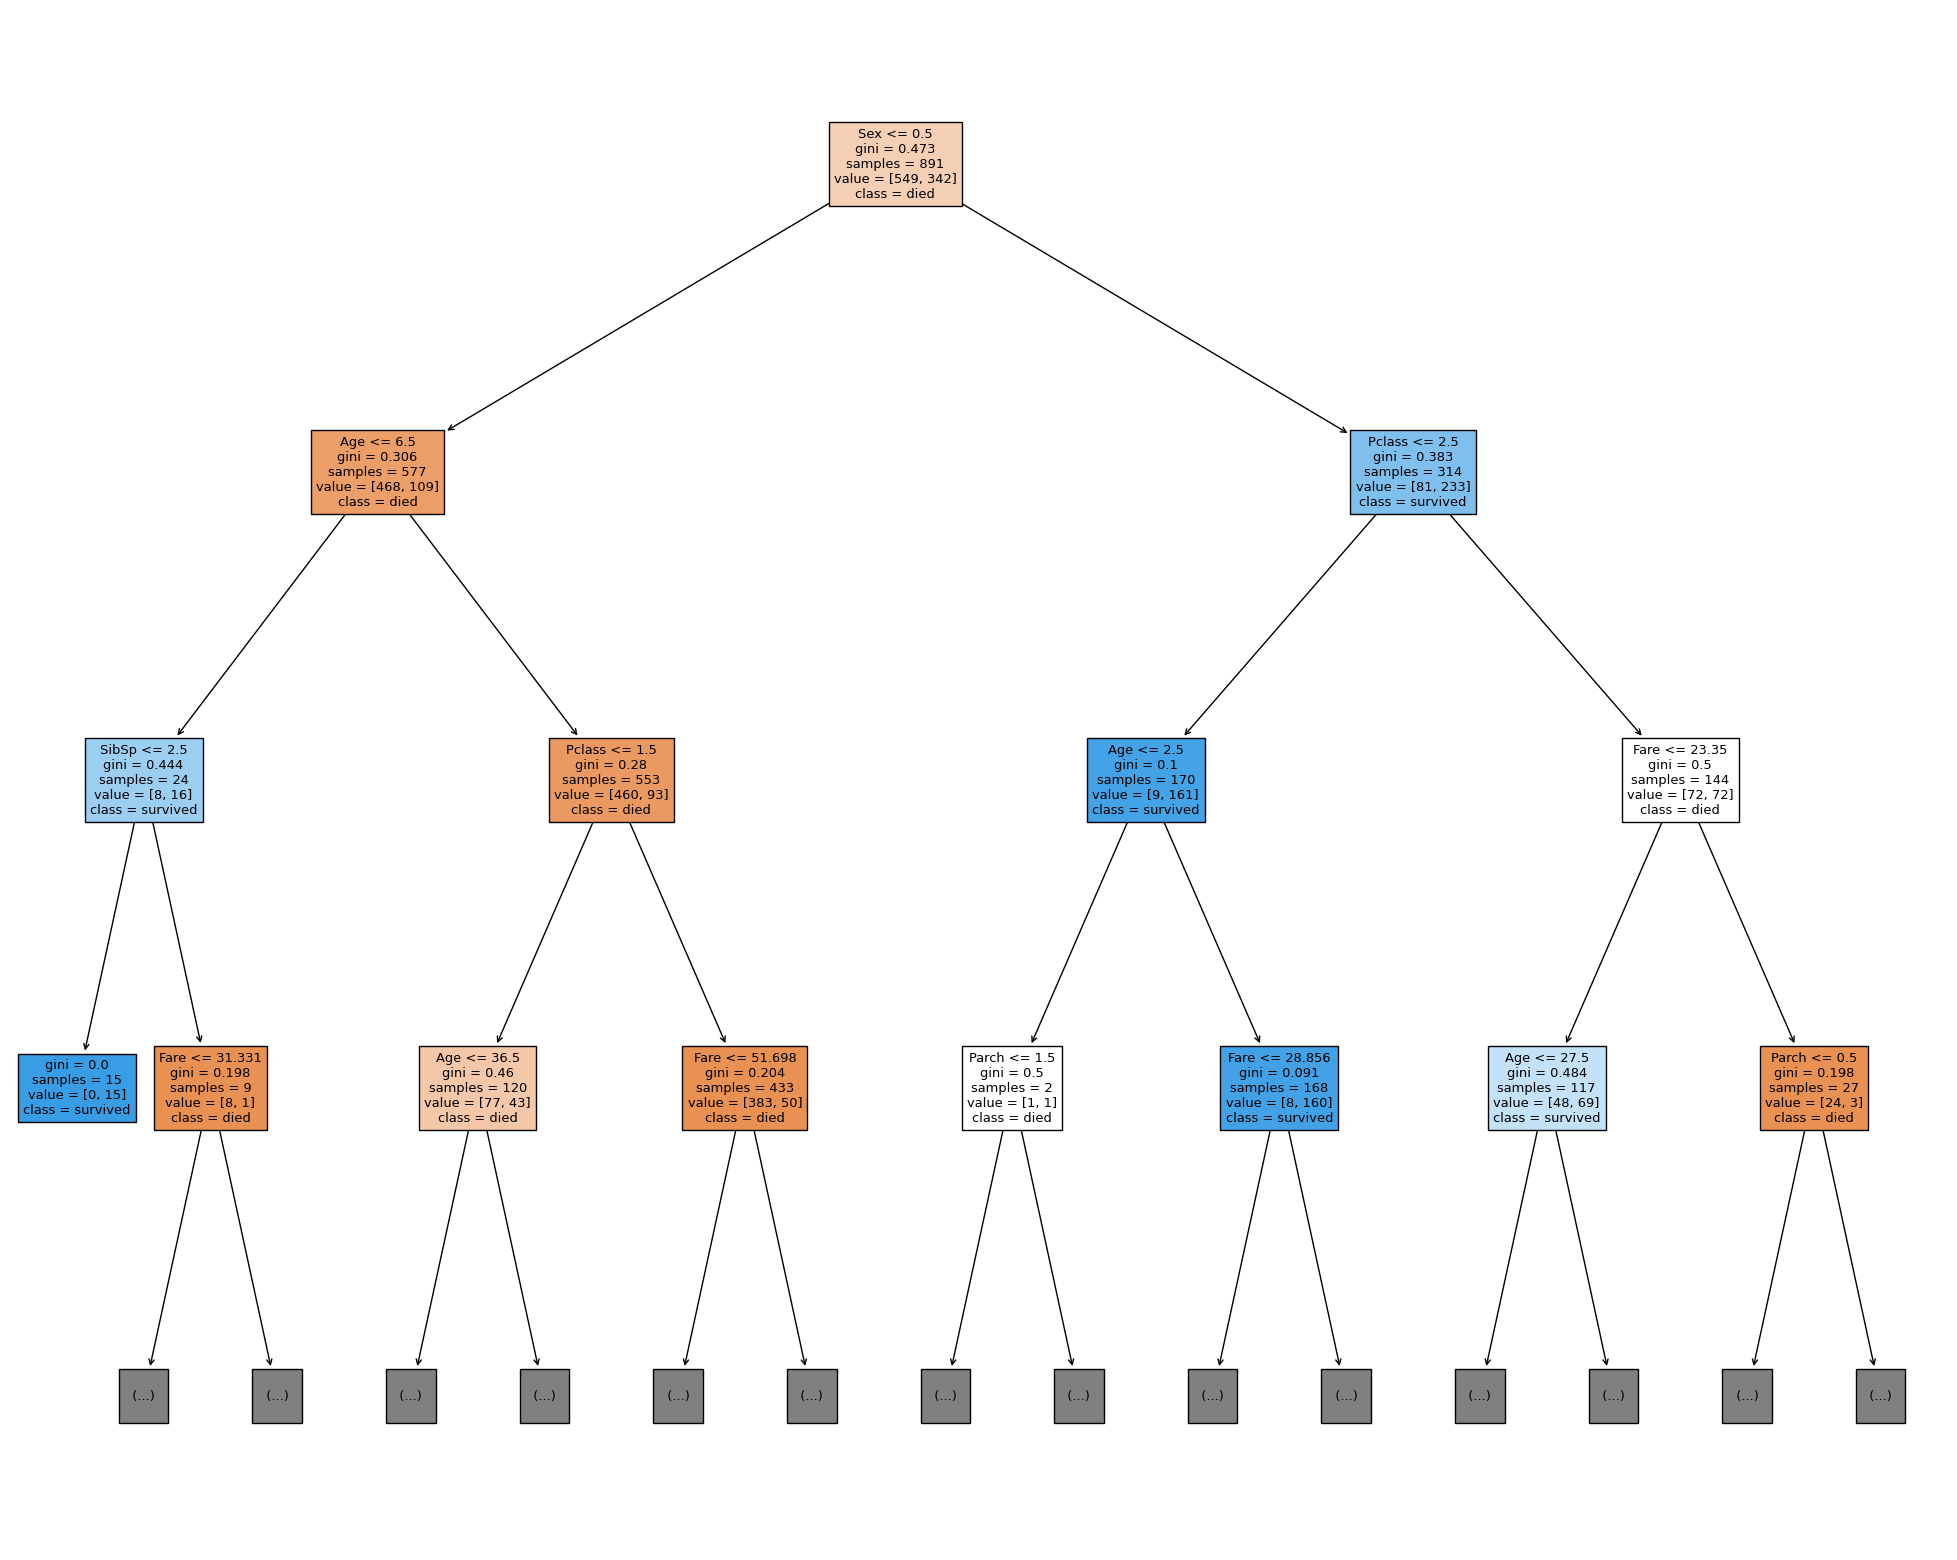

In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

fn=['Pclass','Sex','Age','SibSp','Parch','Fare']
cn=['died', 'survived']
fig = plt.figure(figsize = (25,20))
tree.plot_tree(clf, max_depth=3,feature_names = fn,
               class_names=cn,
               filled = True);